<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/ar_scc_kosaraju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strongly connected components

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 207 (delta 114), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (207/207), 150.74 KiB | 958.00 KiB/s, done.
Resolving deltas: 100% (114/114), done.


In [ ]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import heapq as hq

In [ ]:
%%file 1.adjlist
1 7
2 5
3 9
4 1
5 8
6 3 8
7 4 9
8 2
9 6

Overwriting 1.adjlist


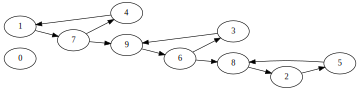

In [ ]:
G = nx.read_adjlist('1.adjlist', create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G)

In [ ]:
def reverseGraph(G):
  Gr = nx.DiGraph()
  for u, v in G.edges:
    Gr.add_edge(v, u)

  return Gr

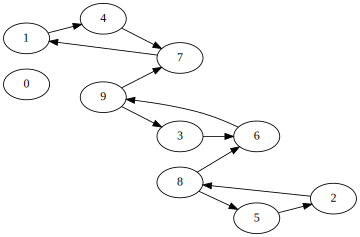

In [ ]:
Gr = reverseGraph(G)
gs.nx2gv(Gr)

## Kosaraju

In [ ]:
def kosaraju(G):
  def dfs1(u):
    print(cont)
    if not Gr.nodes[u]['visited']:
      Gr.nodes[u]['visited'] = True
      for v in Gr.neighbors(u):
        if not Gr.nodes[v]['visited']:
          dfs1(v)
      cont[0] += 1
      hq.heappush(f, (-cont[0], u))

  def dfs2(u):
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      cc.append(u)
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          dfs2(v)

  # reversed graph
  Gr = reverseGraph(G)

  for u in Gr.nodes:
    Gr.nodes[u]['visited'] = False
  cont = [0]
  f = []
  # obtain finalization order F for each node
  for u in Gr.nodes:
    dfs1(u)

  print(cont)
  print(f)

  # DFS for each node on the original Graph in decreasing F order
  for u in G.nodes:
    G.nodes[u]['visited'] = False
  scc = []
  while f:
    _, u = hq.heappop(f)
    cc = []
    dfs2(u)
    if cc:
      scc.append(cc)

  return scc

In [ ]:
kosaraju(G)

[0]
[0]
[0]
[3]
[3]
[3]
[3]
[3]
[6]
[6]
[6]
[9]
[9]
[9]
[9]
[9]
[(-9, 5), (-8, 2), (-6, 9), (-7, 8), (-3, 7), (-2, 1), (-5, 3), (-1, 4), (-4, 6)]


[[5, 8, 2], [9, 6, 3], [7, 4, 1]]

In [ ]:
soyglobal = 4
def f1():
  global soyglobal
  print(soyglobal)
  soyglobal += 1

print(soyglobal)
f1()
print(soyglobal)

4
4
5


In [ ]:
def f2(a, b):
  print(a)
  a += b
  print(a)

x = 10
print(x)
f2(x, 5)
print(x)

y = 10.5
print(y)
f2(y, 5.5)
print(y)

y = "hola"
print(y)
f2(y, " mundo")
print(y)

y = [1, 2, 3]
print(y)
f2(y, [10, 20, 30])
print(y)

10
10
15
10
10.5
10.5
16.0
10.5
hola
hola
hola mundo
hola
[1, 2, 3]
[1, 2, 3]
[1, 2, 3, 10, 20, 30]
[1, 2, 3, 10, 20, 30]


In [ ]:
#import pdb
def tarzan(G): # tarjan
  def strongconnect(v):
    print(v, G.nodes.data())
    G.nodes[v]['index'] = index[0]
    G.nodes[v]['lowlink'] = index[0]
    index[0] += 1
    S.append(v)
    G.nodes[v]['onStack'] = True

    for v, w in G.edges:
      if G.nodes[w]['index'] == None:
        strongconnect(w)
        G.nodes[v]['lowlink'] = min(G.nodes[v]['lowlink'],G.nodes[w]['lowlink'])
      elif G.nodes[w]['onStack']:
        G.nodes[v]['lowlink'] = min(G.nodes[v]['lowlink'],G.nodes[w]['index'])

    #pdb.set_trace()
    if G.nodes[v]['lowlink'] == G.nodes[v]['index']:
      cc = []
      w = -1
      while w != v:
        w = S.pop()
        G.nodes[w]['onStack'] = False
        cc.append(w)
      print(cc)

  index = [0]
  S = []
  for v in G.nodes:
    G.nodes[v]['index'] = None
    G.nodes[v]['lowlink'] = None
    G.nodes[v]['onStack'] = False

  
  for v in G.nodes:
    if G.nodes[v]['index'] == math.inf:
      strongconnect(v)

In [ ]:
tarzan(G)

In [ ]:
min(G.nodes[9]['lowlink'],G.nodes[5]['lowlink'])

3